---
# **TEHREEM ZUBAIR** 
# **BYTEWISE FELLOWSHIP**
# **TASK 19**
---
# **Introduction to Statistical Plotting with Seaborn**
---

Statistical plotting plays a crucial role in analyzing data, uncovering patterns, and deriving insights from datasets. Seaborn, a Python visualization library built on top of Matplotlib, offers powerful tools to create informative and visually appealing statistical graphics. In this notebook we will explore various plotting techniques using Seaborn, ranging from simple linear regression plots to complex multivariate visualizations.

The notebook is structured into three parts, each focusing on different aspects of data visualization:

1. **Linear Regression and Residual Plotting**
2. **Distribution and Variability Visualization** 
3. **Multivariate and Relationship Visualization** 

By the end of this notebook, we will gain proficiency in using Seaborn to create a wide range of statistical plots, enabling us to effectively communicate insights from data through compelling visualizations.

---
# **Linear Regression and Residual Plotting**

To begin with the topic first we need to understand the basic concept of regression. As it will help us alot in learning all the coding concepts related to it.

- Regression is a statistical method that helps us understand and predict the relationship between variables.
- Descibe how one variable(dependent variable) changes as another variable(independent variable) changes.
- **Dependent Variable:** We are trying to predict or explain(Y)
- **Independent Variable:** That are used to predict or exaplin the changes in the dependent variable(X).

**For example:** Predicting salary based on years of experience, predicting results based on study hours, predicting resale price based on vehicle's age.

### **Linear Regression**
- Predicts the relationship between two variables by assuming they have a straight-line connection. 
- It finds the best line that minimizes the differences between predicted and actual values

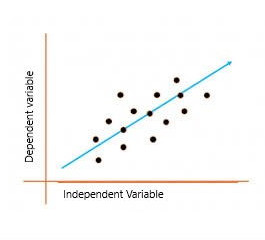

The graph above presents the linear relationship between the output(y) and predictor(X) variables. The blue line is referred to as the best-fit straight line. Based on the given data points, we attempt to plot a line that fits the points the best.

### **Multiple Linear Regression**
Involves drawing a line through a multi-dimensional space of data points, aiming to best represent the relationship between the dependent (outcome) variable and the independent (predictor) variables. 

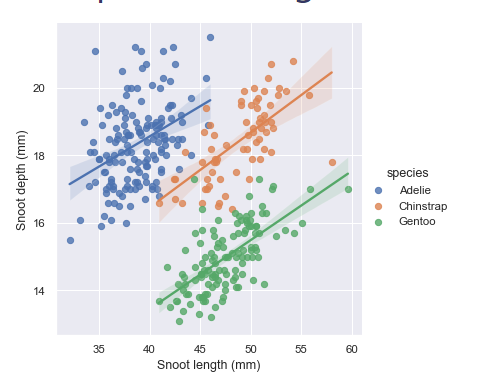

From the above plot we can see that we are predicting the Snoot Depth based on species and snoot length(two variables)


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Regression Plots in Seaborn**
Regression analysis is bivariate analysis because we are looking for relationships between two variables.

The regplot() function is the basis for building regression plots in Seaborn. 

The basic function call is similar to displot(), but we explicitly define the x and y variables as well as the source of the data. Since we are using a pandas DataFrame, the x and y variables refer to the columns in the DataFrame. 

For this set of codes, we will be looking at FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.

First let's import the dataframe.

In [175]:
df = pd.read_csv('/kaggle/input/insurance/insurance_premiums.csv')
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


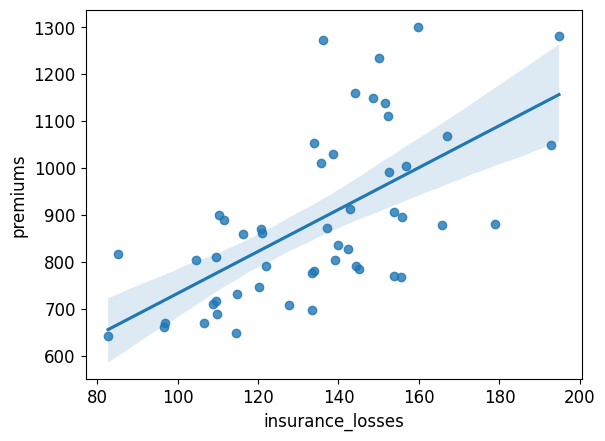

In [176]:
sns.regplot(x='insurance_losses', y='premiums', data=df)
plt.show()

The above plot shows that there is an increasing relation between the insurance losses and premiums. That means that as  average loss per insured vehicle year increase the average annual automobile insurance premiums paid by drivers also increase.

One of the confusing points about Seaborn is that it may seem like there is more than one way to do the same plot. However that's nt always the case. 

- The lower level `regplot()` and higher level `lmplot()` are related. 

- They are called the same way and produce similar output. However, the `lmplot()` is much more powerful. 

In this example, we can look at the relationship between alcohol content and quality using lmplot() The output looks similar except for the aspect ratio.

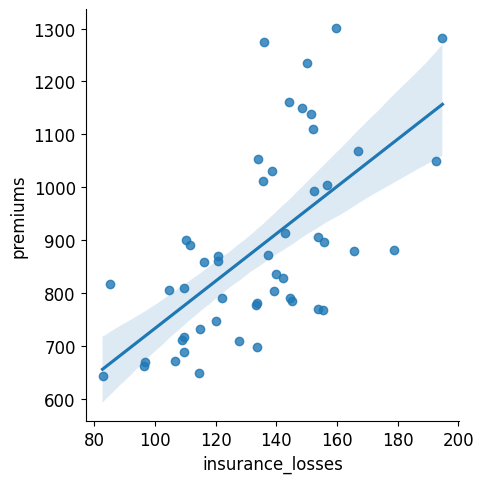

In [177]:
sns.lmplot(x='insurance_losses', y='premiums', data=df)
plt.show()

The output looks similar except for the aspect ratio. Now we will see how the lmplot() is much more flexible.


### **lmplot faceting**
The use of hue and columns is a powerful concept that is present throughout many of Seaborn's functions. 

- The use of plotting multiple graphs while changing a single variable is often called faceting. 
- In this case, faceting can be accomplished by using the lmplot() function. 
- The base function is very similar to regplot() but it provides much more power by allowing you to add additional information using columns, colors, or rows. 


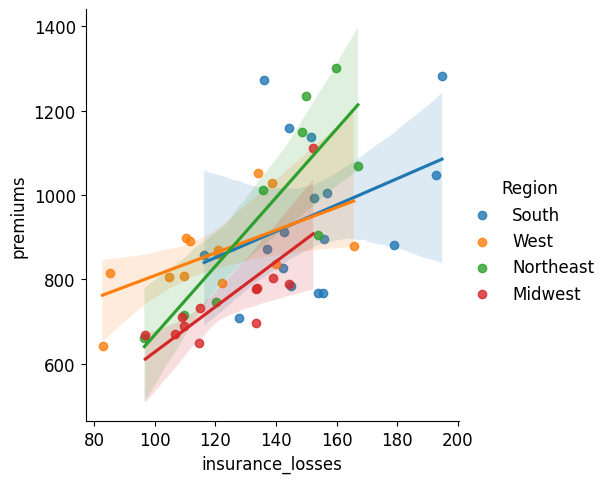

In [178]:
sns.lmplot(x='insurance_losses', y='premiums', data=df, hue='Region')
plt.show()

The results are bit difficult to read. Maybe using multiple lines is not the best approach. Let's try another way.

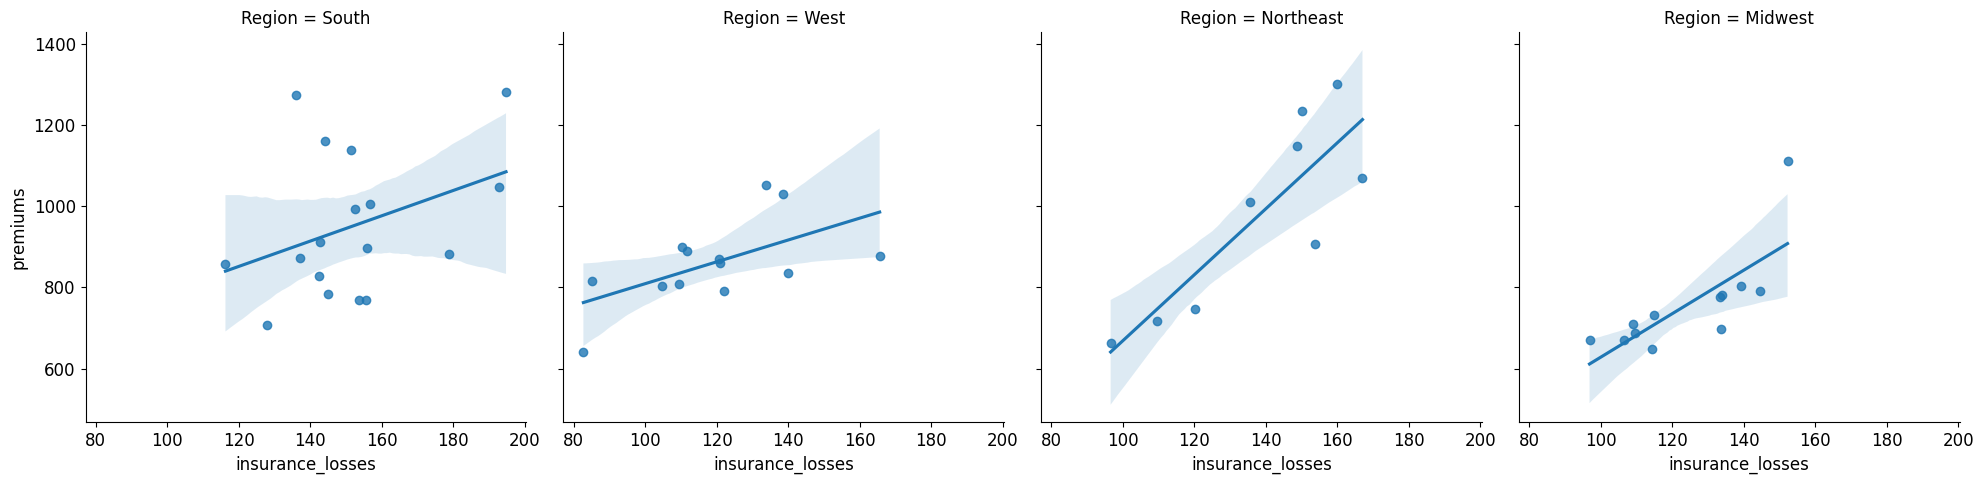

In [179]:
sns.lmplot(x='insurance_losses', y='premiums', data=df, col='Region')
plt.show()

That was the basic idea behind the regression in seaborn . Now let's do some pratice on the tips dataset that contains the inforamtion about the tip amount given to the waiters by the customers. 

In [180]:
tips = pd.read_csv('/kaggle/input/tipsdataset/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The two functions that can be used to visualize a linear fit are regplot() and lmplot().

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

Now let's try to learn the relation between the total bill and the tips given.

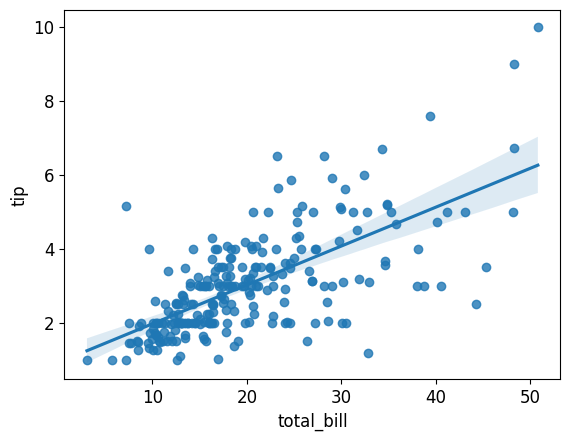

In [181]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

We can also use lmplot() for plotting the above plot.

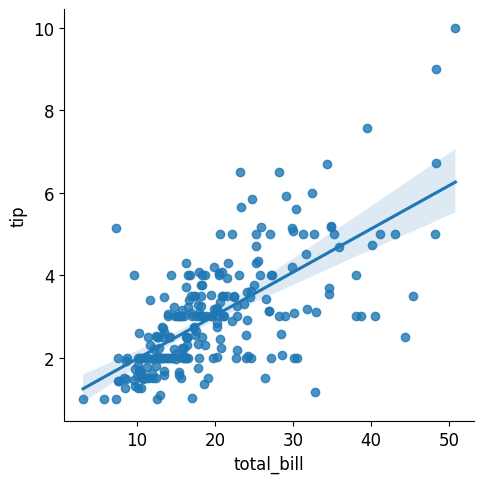

In [182]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

These functions draw similar plots, but regplot() is an axes-level function, and lmplot() is a figure-level function.

- Additionally, regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas.Series objects, or as references to variables in a pandas.DataFrame object passed to data. 

- In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. Finally, only lmplot() has hue as a parameter.

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal

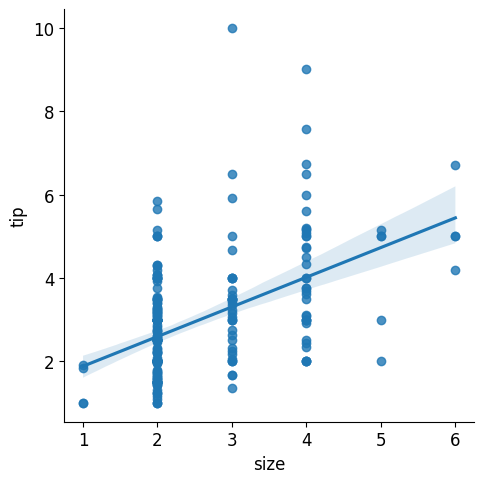

In [183]:
sns.lmplot(x="size", y="tip", data=tips);
plt.show()

One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

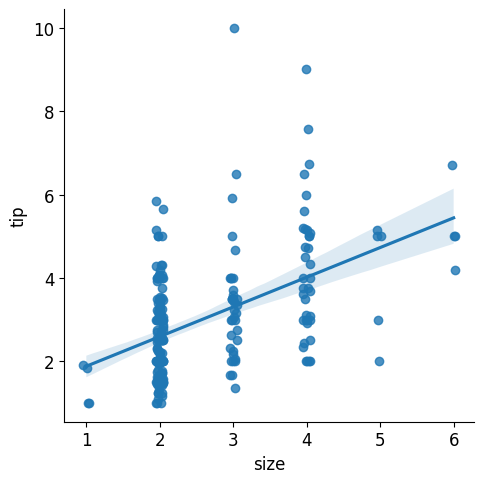

In [184]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.05)
plt.show()

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [185]:
anscombe = pd.read_csv('/kaggle/input/quartet-dataset/Anscombe_quartet_data.csv')

In [186]:
anscombe.head()

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47


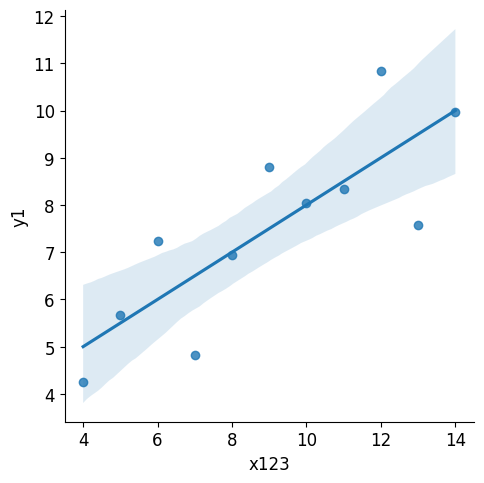

In [187]:
sns.lmplot(x='x123', y='y1', data=anscombe)

The above plot clearly shows that it lineraly fits the data well. Now if we want to draw a linear regression line using the data points of the column y2 we get some different reuslts

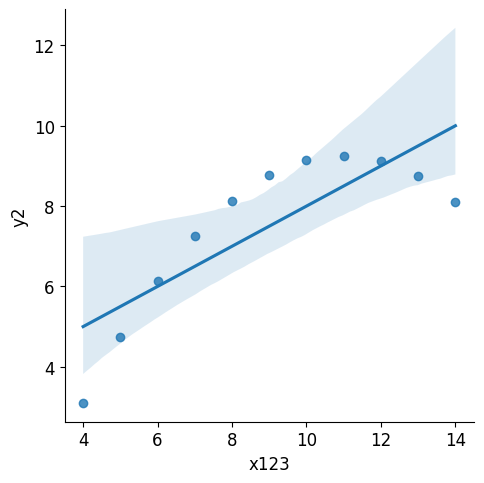

In [188]:
sns.lmplot(x='x123', y='y2', data=anscombe)

From the above plot we can see that the relation between the tewo variables is not linear instead it is a quadratic relation so in the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

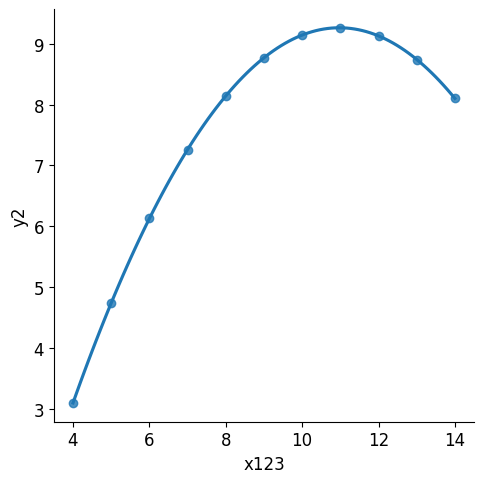

In [189]:
sns.lmplot(x='x123', y='y2', data=anscombe, order=2, ci=None)

Another problem is the presence of oulier in the data, For example if we plt x123 against y3 we get the following results:

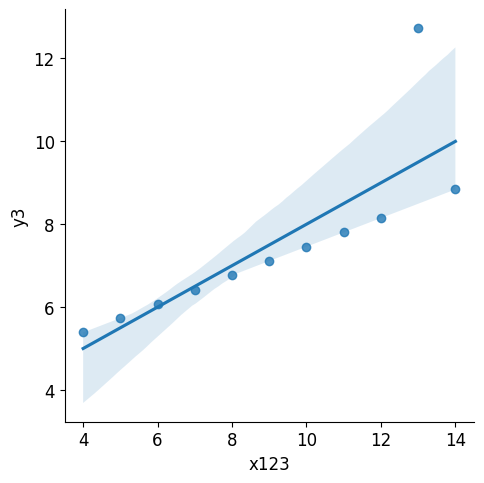

In [190]:
sns.lmplot(x='x123', y='y3', data=anscombe)

In the presence of outlier we can use the robust regression which instead of the standard least squares method minimizes the sum of squared residuals,

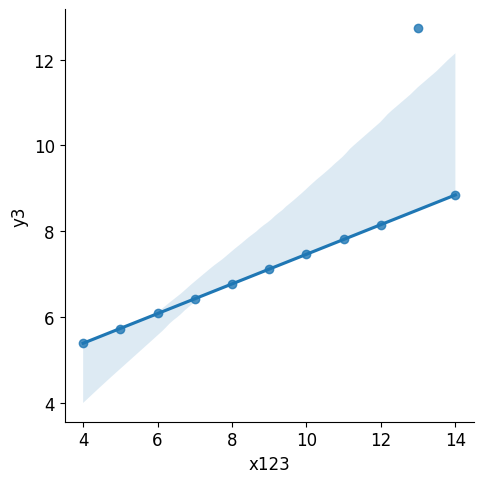

In [191]:
sns.lmplot(x='x123', y='y3', data=anscombe, robust=True)

## **Residual plots**
Residual plots are a crucial diagnostic tool in regression analysis. 

They help visualize the difference between observed and predicted values (residuals) to check the goodness-of-fit for your regression model. 

Residuals are the errors in the prediction, and plotting them helps identify patterns that suggest inadequacies in the model.

The `residplot()` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0

<Axes: xlabel='x123', ylabel='y1'>

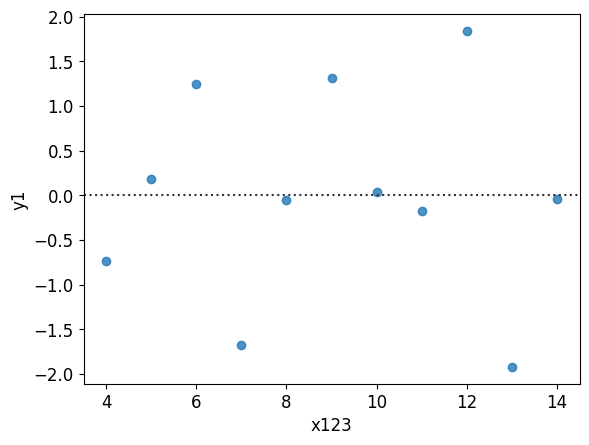

In [192]:
sns.residplot(x='x123', y='y1', data=anscombe)

If there is structure in the residuals, it suggests that simple linear regression is not appropriate. For example:

<Axes: xlabel='x123', ylabel='y2'>

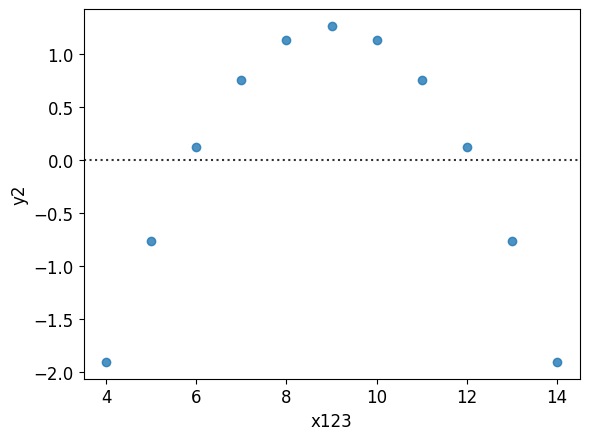

In [193]:
sns.residplot(x='x123', y='y2', data=anscombe)

Conditionaing on other variables


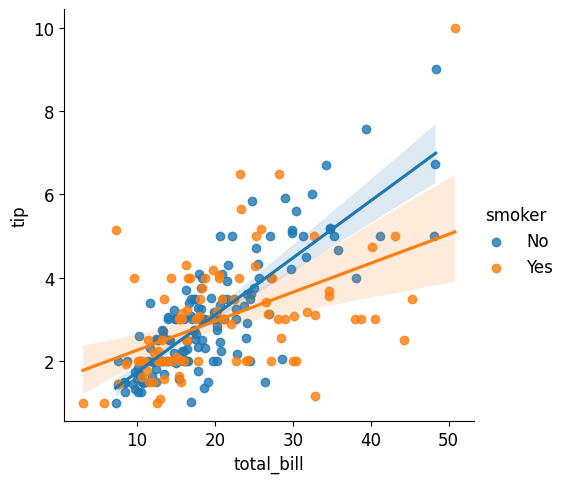

In [194]:
sns.lmplot(x='total_bill', y='tip',  data=tips, hue='smoker')

To add another variable, you can draw multiple “facets” with each level of the variable appearing in the rows or columns of the grid:

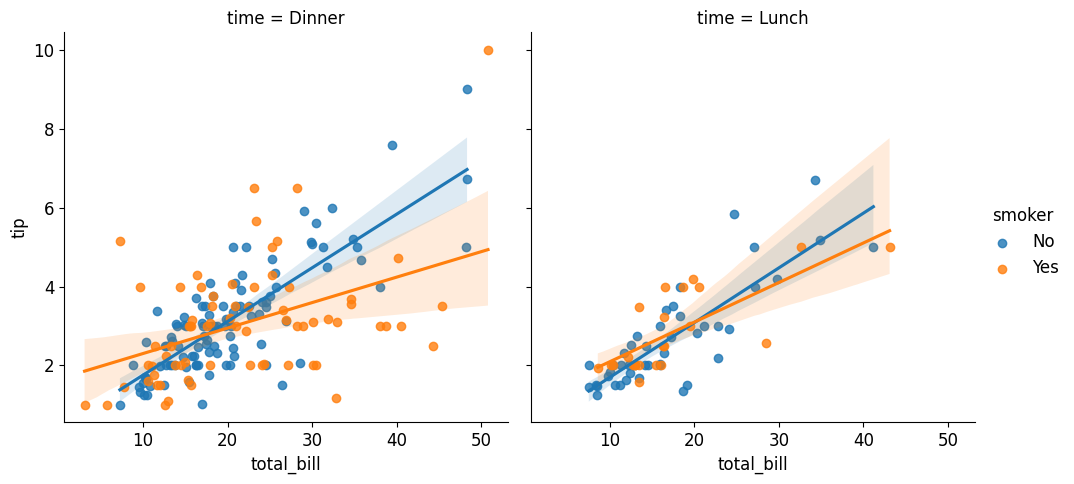

In [195]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

In [196]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


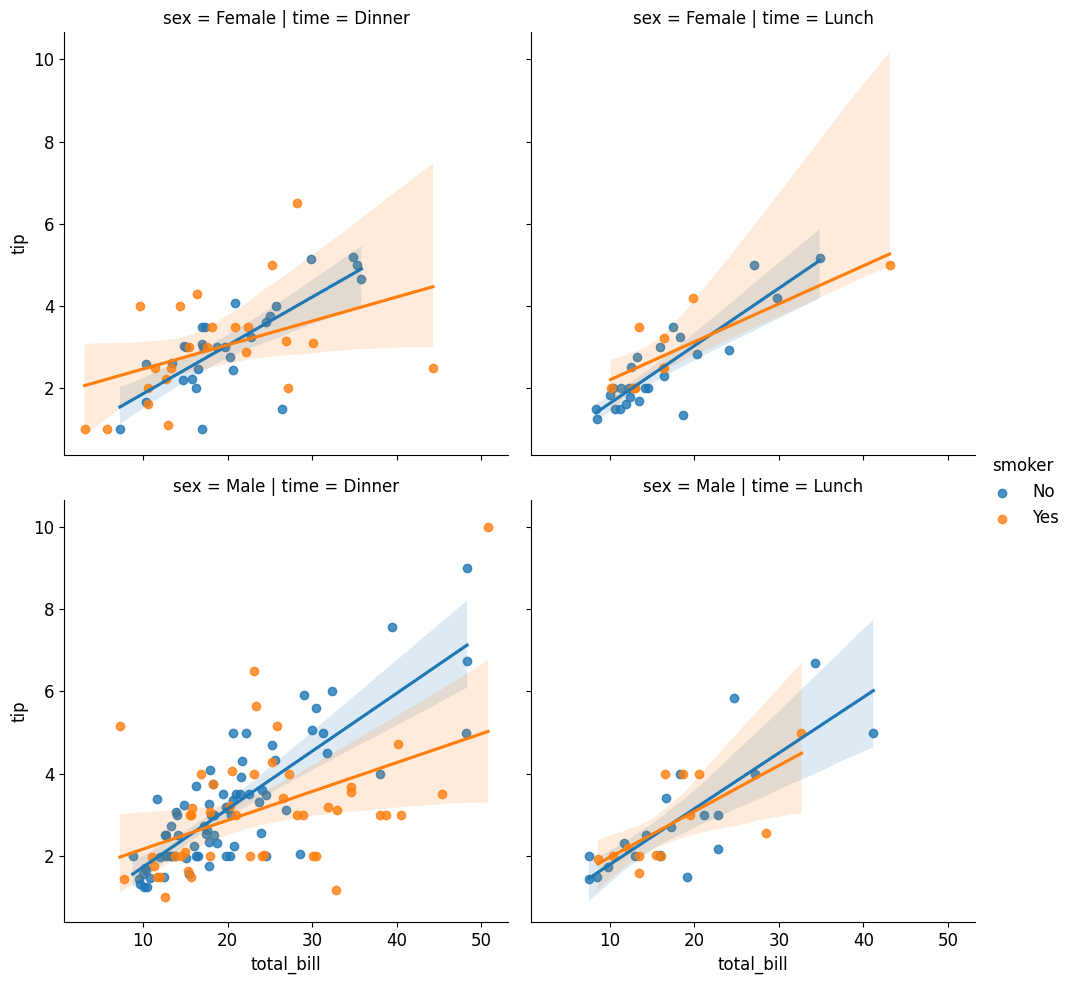

In [197]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row='sex', data=tips)

---
# **Distribution and Variability Visualization**

## **Histogram**
A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().


The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. 
- If the bins are too large, they may erase important features. - On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution. 
- The default bin size is determined using a reference rule that depends on the sample size and variance. This works well in many cases, (i.e., with “well-behaved” data) but it fails in others. - It is always a good to try different bin sizes to be sure that you are not missing something important. 
- This function allows you to specify bins in several different ways, such as by setting the total number of bins to use, the width of each bin, or the specific locations where the bins should break.

For understanding hitograms we will be using the data that contains information about schools that have received transformation awards. Each row represents a different school, providing details about the school's name, location, the school district it belongs to, the selected transformation model, the award amount received, and the region where the school is located.

1. **Unnamed: 0**
   - *Description:* Index column
   - *Type:* Integer

2. **School Name**
   - *Description:* Name of the school
   - *Type:* String

3. **City**
   - *Description:* City where the school is located
   - *Type:* String

4. **State**
   - *Description:* State where the school is located
   - *Type:* String

5. **District Name**
   - *Description:* Name of the school district
   - *Type:* String

6. **Model Selected**
   - *Description:* Model selected for the school's transformation
   - *Type:* String

7. **Award_Amount**
   - *Description:* Amount awarded for the school's transformation
   - *Type:* Integer

8. **Region**
   - *Description:* Region where the school is located
   - *Type:* String


In [198]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Assign a variable to x to plot a univariate distribution along the x axis:

<Axes: xlabel='total_bill', ylabel='Count'>

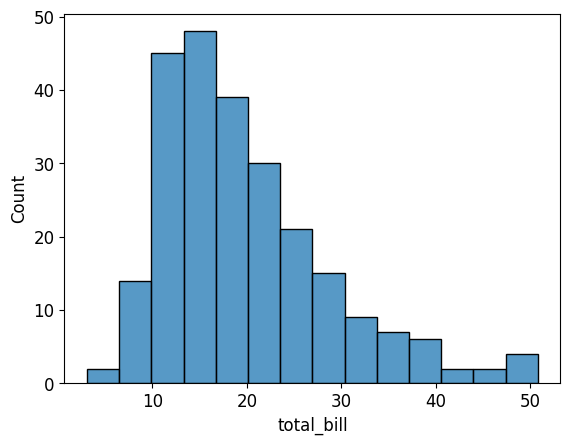

In [199]:
sns.histplot(x='total_bill', data=tips)

Flip the plot by assigning the data variable to the y axis:

<Axes: xlabel='Count', ylabel='total_bill'>

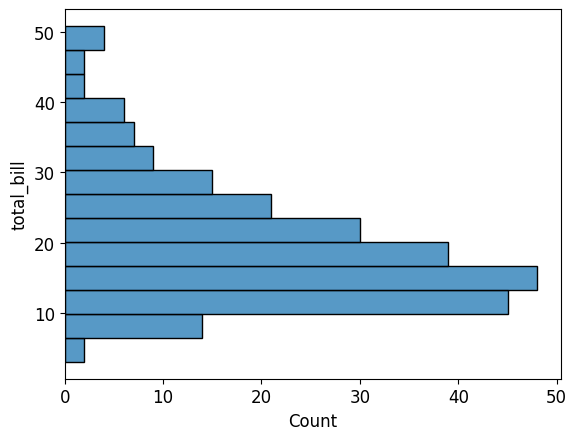

In [200]:
sns.histplot(y='total_bill', data=tips)

Aso set the binwidth to see how well histogram represent the data. For example: binwidth=3 will create three bins in each interval of histogram.

<Axes: xlabel='total_bill', ylabel='Count'>

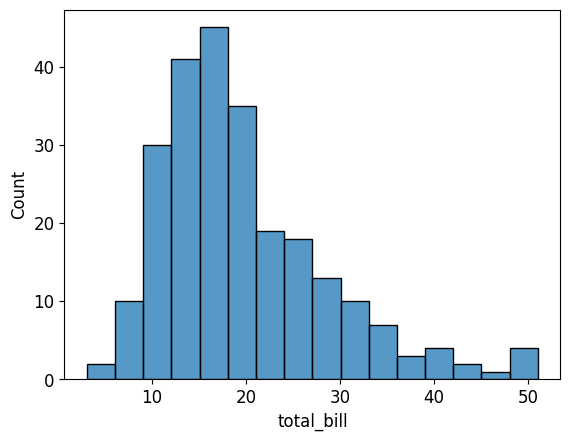

In [201]:
sns.histplot(x='total_bill', data=tips, binwidth=3)

We can also specfy the total bins we want in our histplot.

<Axes: xlabel='total_bill', ylabel='Count'>

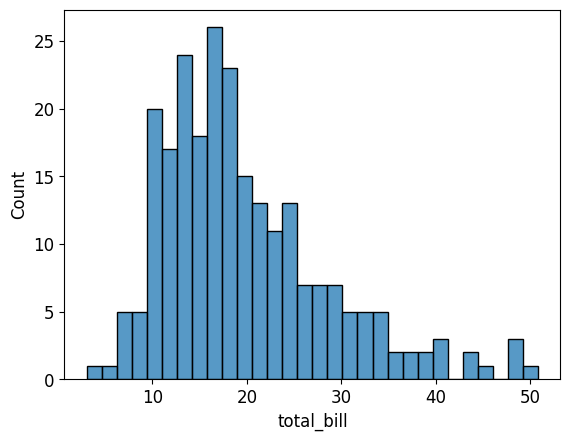

In [202]:
sns.histplot(x='total_bill', data=tips, bins=30)

Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

<Axes: xlabel='total_bill', ylabel='Count'>

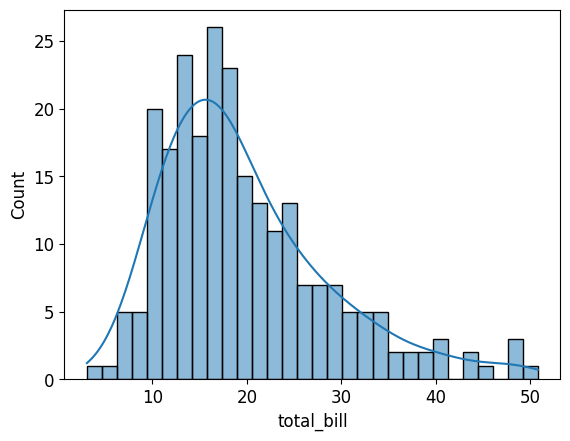

In [203]:
sns.histplot(x='total_bill', data=tips, kde=True, bins=30)

If neither x nor y is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column:

<Axes: ylabel='Count'>

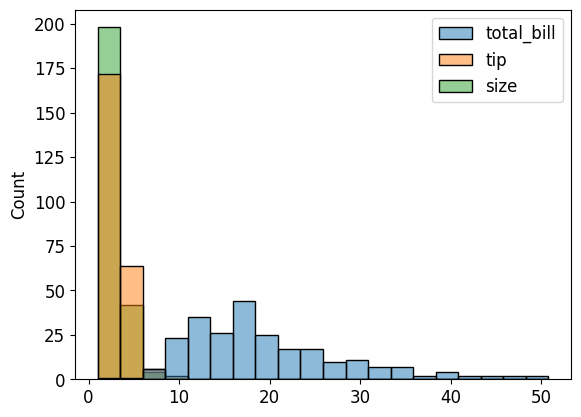

In [204]:
sns.histplot(data=tips)

You can otherwise draw multiple histograms from a long-form dataset with hue mapping:

<Axes: xlabel='tip', ylabel='Count'>

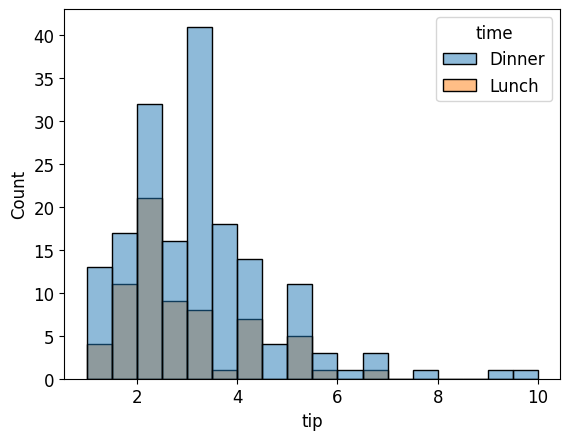

In [205]:
sns.histplot(x='tip', data=tips, hue='time')

The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them:

<Axes: xlabel='tip', ylabel='Count'>

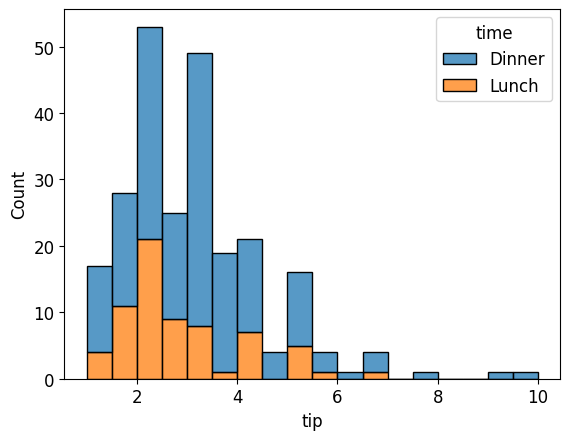

In [206]:
sns.histplot(x='tip', data=tips, hue='time', multiple='stack')

Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function:

<Axes: xlabel='tip', ylabel='Count'>

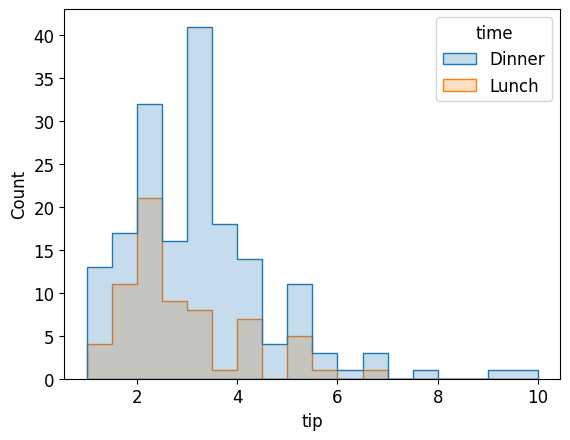

In [207]:
sns.histplot(x='tip', data=tips, hue='time', element='step')

You can move even farther away from bars by drawing a polygon with vertices in the center of each bin. This may make it easier to see the shape of the distribution, but use with caution: it will be less obvious to your audience that they are looking at a histogram:

<Axes: xlabel='tip', ylabel='Count'>

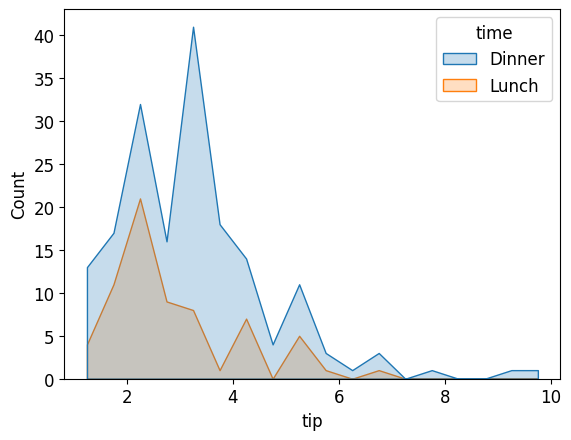

In [208]:
sns.histplot(x='tip', data=tips, hue='time', element='poly')

<Axes: xlabel='total_bill', ylabel='tip'>

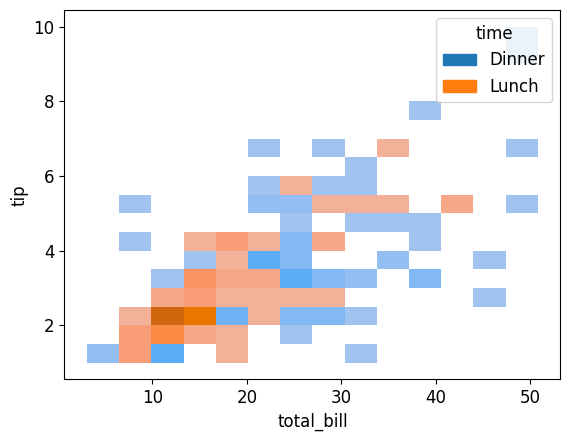

In [209]:
sns.histplot(tips, x="total_bill", y="tip", hue='time')

## **Kernel Density Estimate (KDE) Plot**
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

KDEs allow us to visualize distributions. KDEs are considered more interpretable, though, especially when multiple distributions are shown. Due to the smoothing algorithm used in KDE plots, the curve can include values that don't make sense, so it's important to set good smoothing parameters.

Let's say we have a dataset of divorce dataset that contain information

In [210]:
df = pd.read_csv('/kaggle/input/divorce-dataset/divorce.csv')
df.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


Now let's see the relation betweenthe marriage duration and education. We can use histogram to see this relationship.

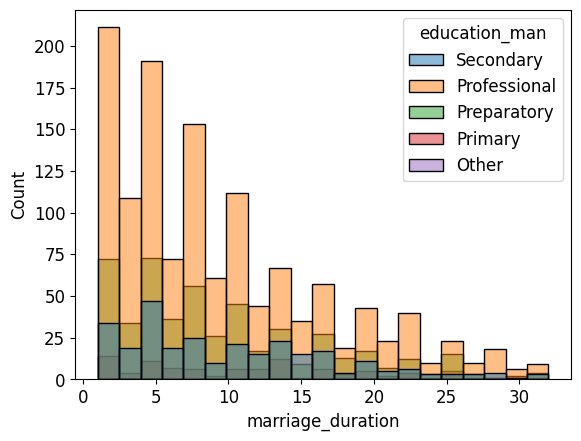

In [211]:
sns.histplot(x='marriage_duration', data=df, hue='education_man')
plt.show()

The resulting histogram reinforces that we have a lot of information on males with professional-level education. However, because the education levels are stacked on top of each other, the relationship between marriage duration and male education level isn't super clear.

Seaborn's Kernel Density Estimate or KDE plots address this issue. 

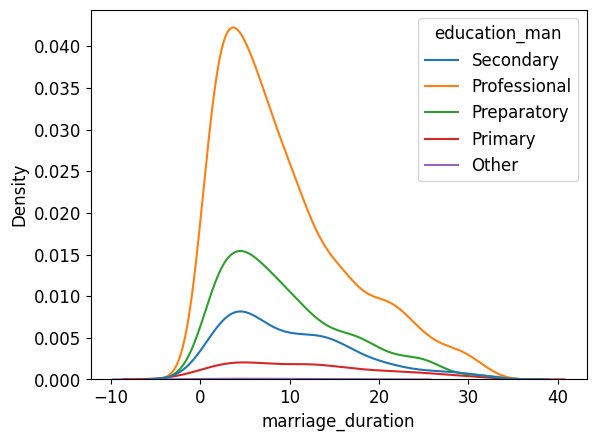

In [212]:
sns.kdeplot(x='marriage_duration', hue='education_man', data=df)
plt.show()

Similar to histograms, KDEs allow us to visualize distributions. KDEs are considered more interpretable, though, especially when multiple distributions are shown as they are here. Notice that the location of the peak marriage duration for each level of the male partner's education is more identifiable in this KDE plot than it was in the histogram. However, due to the smoothing algorithm used in KDE plots, the curve can include values that don't make sense, so it's important to set good smoothing parameters.

Zooming in on the KDE plot showing the distribution of male education levels, we can see that the distribution seems to suggest that some couples had marriage durations of less than zero. That's impossible!

**`cut` Argument**
To fix this, we can use the cut keyword argument. cut tells Seaborn how far past the minimum and maximum data values the curve should go when smoothing is applied. When we set cut equal to zero, the curve will be limited to values between the minimum and maximum x values, here, the minimum and maximum values for marriage duration. The plot now shows only marriage durations greater than or equal to one year, the shortest marriage duration in the dataset.

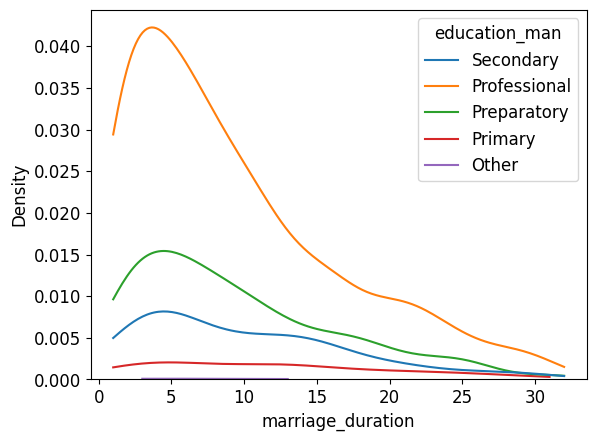

In [213]:
sns.kdeplot(x='marriage_duration', hue='education_man', data=df, cut=0)
plt.show()

#### **Cumulative KDE Plots**
If we're interested in the cumulative distribution function, we can set the cumulative keyword argument to True. This graph describes the probability that marriage duration is less than or equal to the value on the x-axis for each level of male partner education.

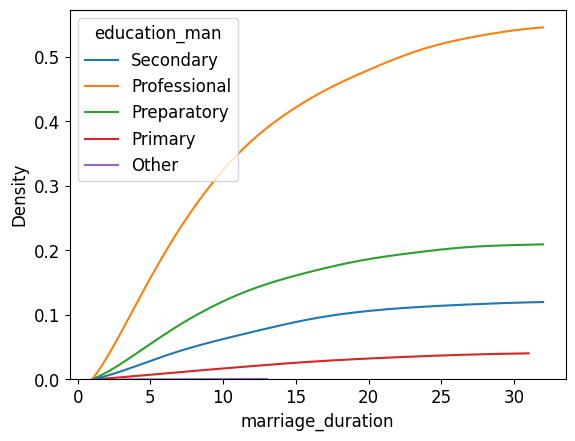

In [214]:
sns.kdeplot(x='marriage_duration', hue='education_man', data=df, cut=0, cumulative=True)
plt.show()

## **Distribution Plots**
Distribution plots in Seaborn are visualizations used to show the distribution of a dataset. They help in understanding the underlying pattern, spread, and density of the data. Seaborn provides several functions for creating distribution plots, each serving a specific purpose. 

Combines a histogram and KDE plot into a single plot.

Plot the distribution of the income_man and income_woman columns using sns.distplot:

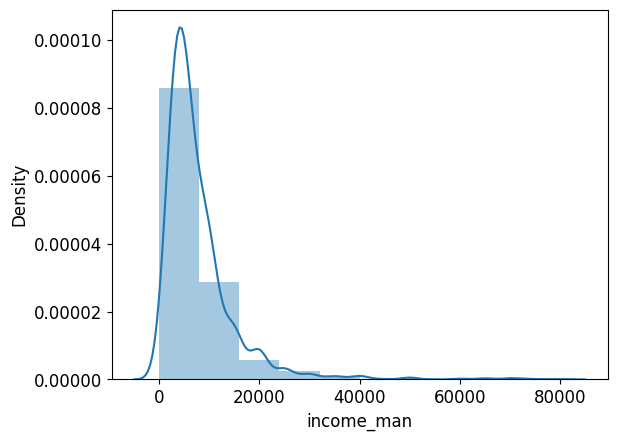

In [215]:
# Distribution plot for income_man
sns.distplot(df['income_man'], hist=True, kde=True, bins=10)
plt.show()

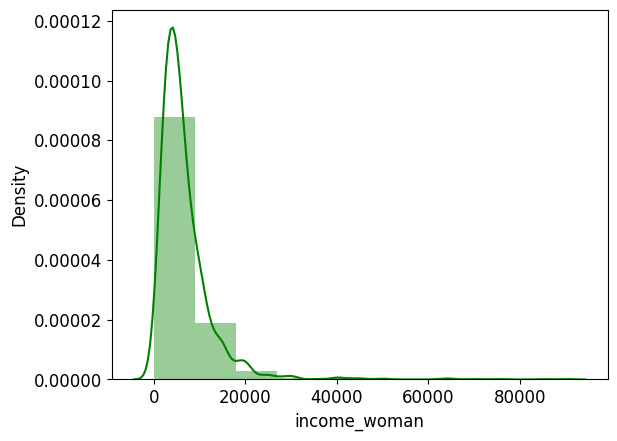

In [216]:

# Distribution plot for income_woman
sns.distplot(df['income_woman'], hist=True, kde=True, bins=10, color='green')
plt.show()


KDE stands for Kernel Density Estimation and that is another kind of the plot in seaborn.
bins is used to set the number of bins you want in your plot and it actually depends on your dataset.
color is used to specify the color of the plot

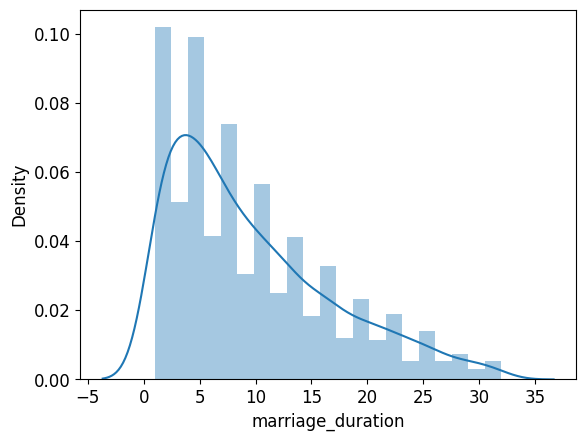

In [217]:
sns.distplot(df['marriage_duration'], kde=True)
plt.show()

## **Box Plots**
- A box plot shows the distribution of quantitative data. 
- The colored box represents the 25th to 75th percentile, and the line in the middle of the box represents the median. 
- The whiskers give a sense of the spread of the distribution, and the floating points represent outliers. 
- Box plots are commonly used as a way to compare the distribution of a quantitative variable across different groups of a categorical variable. 


While Seaborn does have a "boxplot()" function, we'll be using the "catplot()" function that we introduced in an earlier lesson because it makes it easy to create subplots using the "col" and "row" parameters. We'll put the categorical variable "time" on the x-axis and the quantitative variable "total bill" on the y-axis. Here, we want box plots, so we'll specify kind="box". 

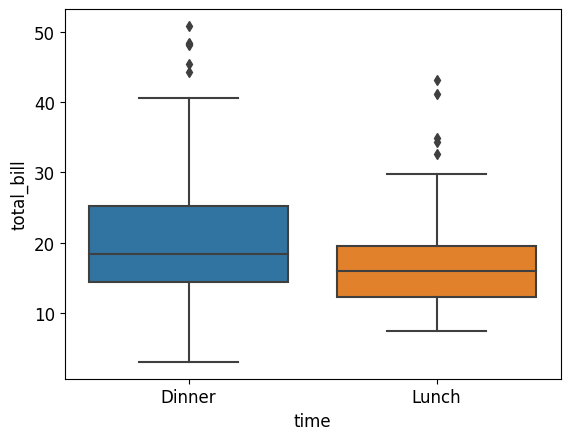

In [218]:
g = sns.boxplot(x='time', y='total_bill', data=tips)

#### **Change the order of categories**

As a reminder, "catplot" allows you to change the order of the categories using the "order" parameter. Here, we specified that "dinner" should be shown before "lunch".

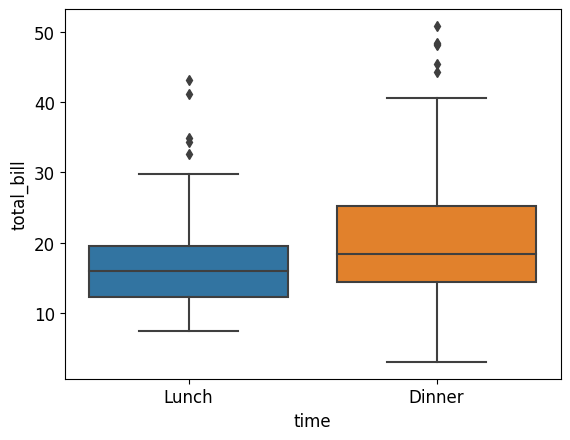

In [219]:
g = sns.boxplot(x='time', y='total_bill', data=tips, order=['Lunch', 'Dinner'])

#### **Omitting outlier using `sym`**
We can omit the outlier using the "sym" parameter. If you pass an empty string into "sym", it will omit the outliers from your plot altogether. "Sym" can also be used to change the appearance of the outliers instead of omitting them.

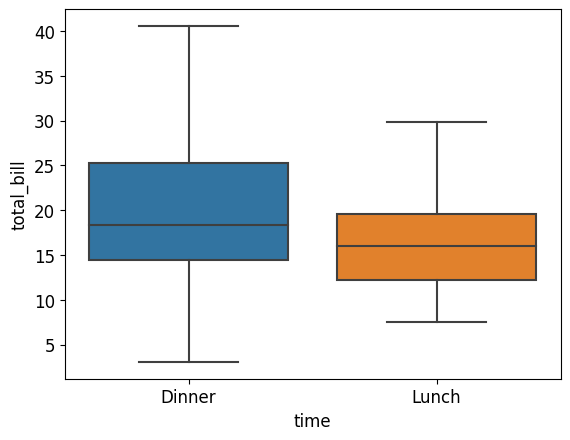

In [220]:
g = sns.boxplot(x='time', y='total_bill', data=tips, sym="")

#### **Changing whiskers using `whis`**
By default, the whiskers extend to 1 point 5 times the interquartile range, or "IQR". The IQR is the 25th to the 75th percentile of a distribution of data. 

If you want to change the way the whiskers in your box plot are defined, you can do this using the "whis" parameter. There are several options for changing the whiskers. You can change the range of the whiskers from 1 point 5 times the IQR (which is the default) to 2 times the IQR by setting "whis" equal to 2.0. 

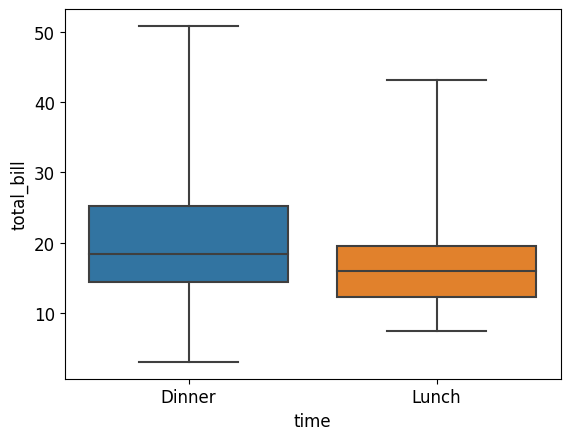

In [221]:
g = sns.boxplot(x='time', y='total_bill', data=tips, whis=[0, 100])

## **Violen Plots**
A violin plot is similar to a box plot and displays the same overall statistics of the data, except that it also displays the distribution shape for that data. Like with box plots, we can create a single violin plot for the data in interest or, more often, multiple violin plots, each for a separate category of a categorical variable.
A violin plot is similar to a box plot and displays the same overall statistics of the data, except that it also displays the distribution shape for that data. Like with box plots, we can create a single violin plot for the data in interest or, more often, multiple violin plots, each for a separate category of a categorical variable.

The default violinplot represents a distribution two ways: a patch showing a symmetric kernel density estimate (KDE), and the quartiles / whiskers of a box plot:

In [222]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='tip'>

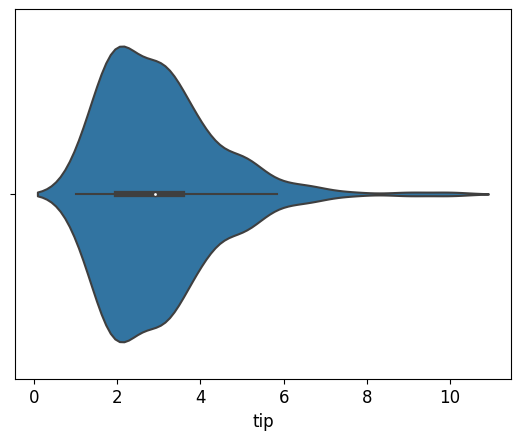

In [223]:
sns.violinplot(x=tips['tip'])

In a bivariate plot, one of the variables will “group” so that multiple violins are drawn:

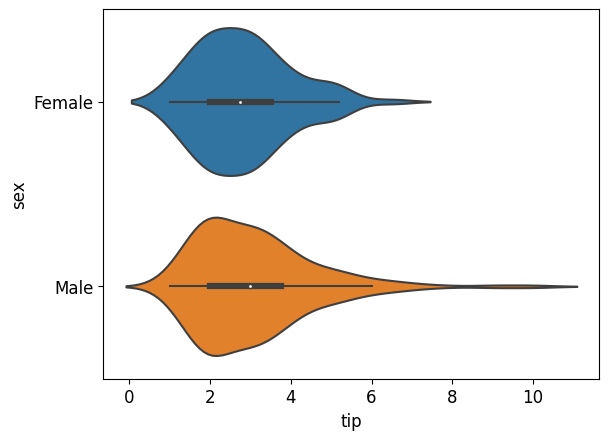

In [224]:
sns.violinplot(data=tips, x='tip', y='sex')
plt.show()

By default, the orientation of the plot is determined by the variable types, preferring to group by a categorical variable:

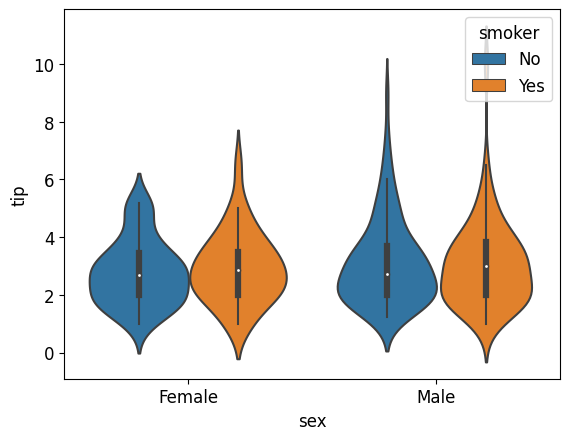

In [225]:
sns.violinplot(data=tips, y='tip', x='sex', hue='smoker')
plt.show()

Represent every observation inside the distribution by setting inner="stick" or inner="point":

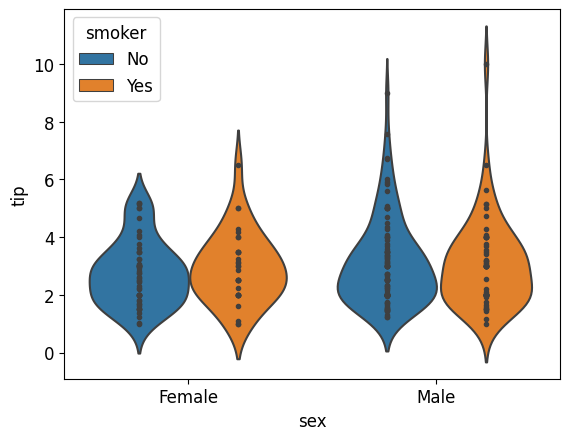

In [226]:
sns.violinplot(data=tips, y='tip', x='sex', hue='smoker', inner='point')
plt.show()

From the above plots we can infer that:
- Non-smoking females have a higher density around the lower tip values and a more uniform spread across the range.
- Smoking females have a less dense distribution at the lower values and a slightly wider spread.
- Both smoking and non-smoking males have a higher density at lower tip values, but there are more notable outliers at higher tip values for smokers.
- The spread is wider for smokers, indicating more variability in tip amounts.

---
## **Pair Plot**
A pair plot is a type of data visualization that shows pairwise relationships between multiple variables in a dataset. In Seaborn, sns.pairplot() is a convenient function to create pair plots. Each plot on the diagonal is a distribution plot (typically a histogram or kernel density plot) for a single feature, while the off-diagonal plots are scatter plots or other types of visualizations showing pairwise relationships between features.

- They help identify patterns, correlations, and potential outliers.
- By visualizing the relationships between features, pair plots can guide the selection of relevant features for modeling.
- They facilitate the analysis of how different features interact with each other.

In [227]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.set_index('Id', inplace = True)

In [228]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


The simplest invocation uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal:

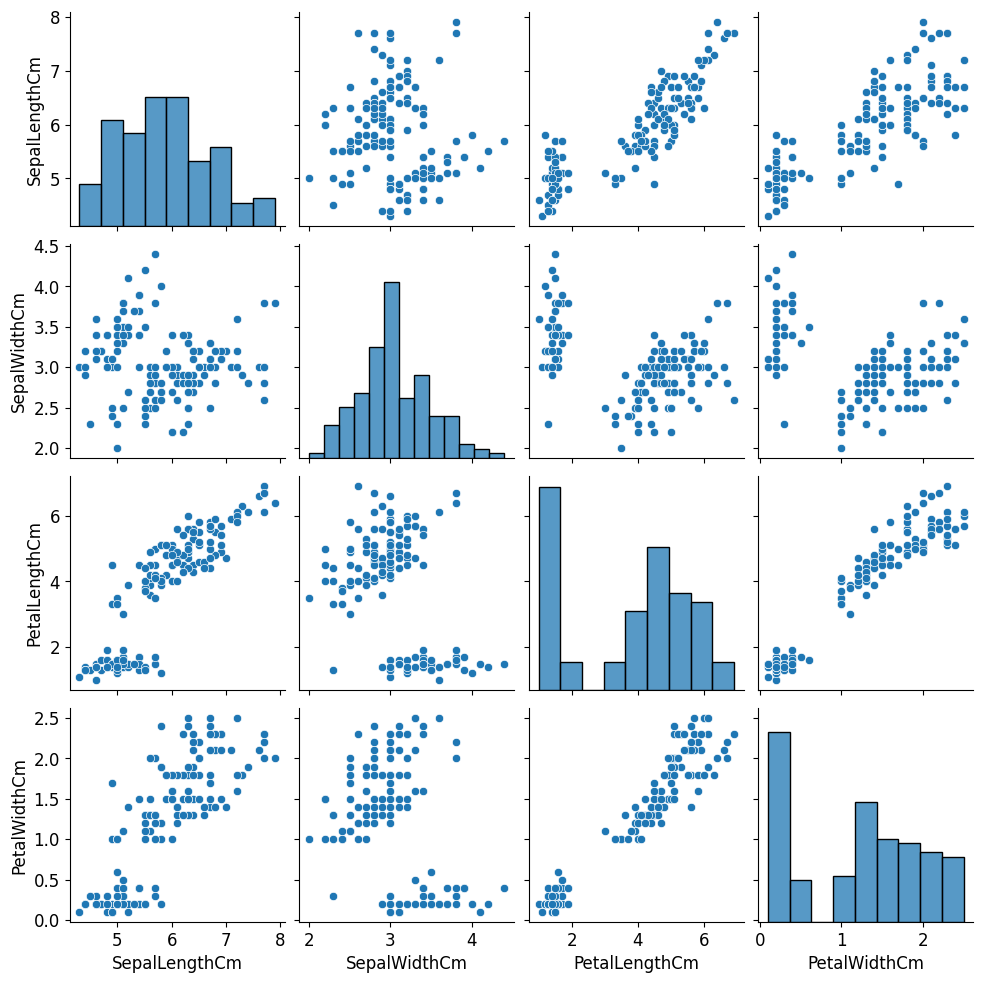

In [229]:
sns.pairplot(data=iris)


Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

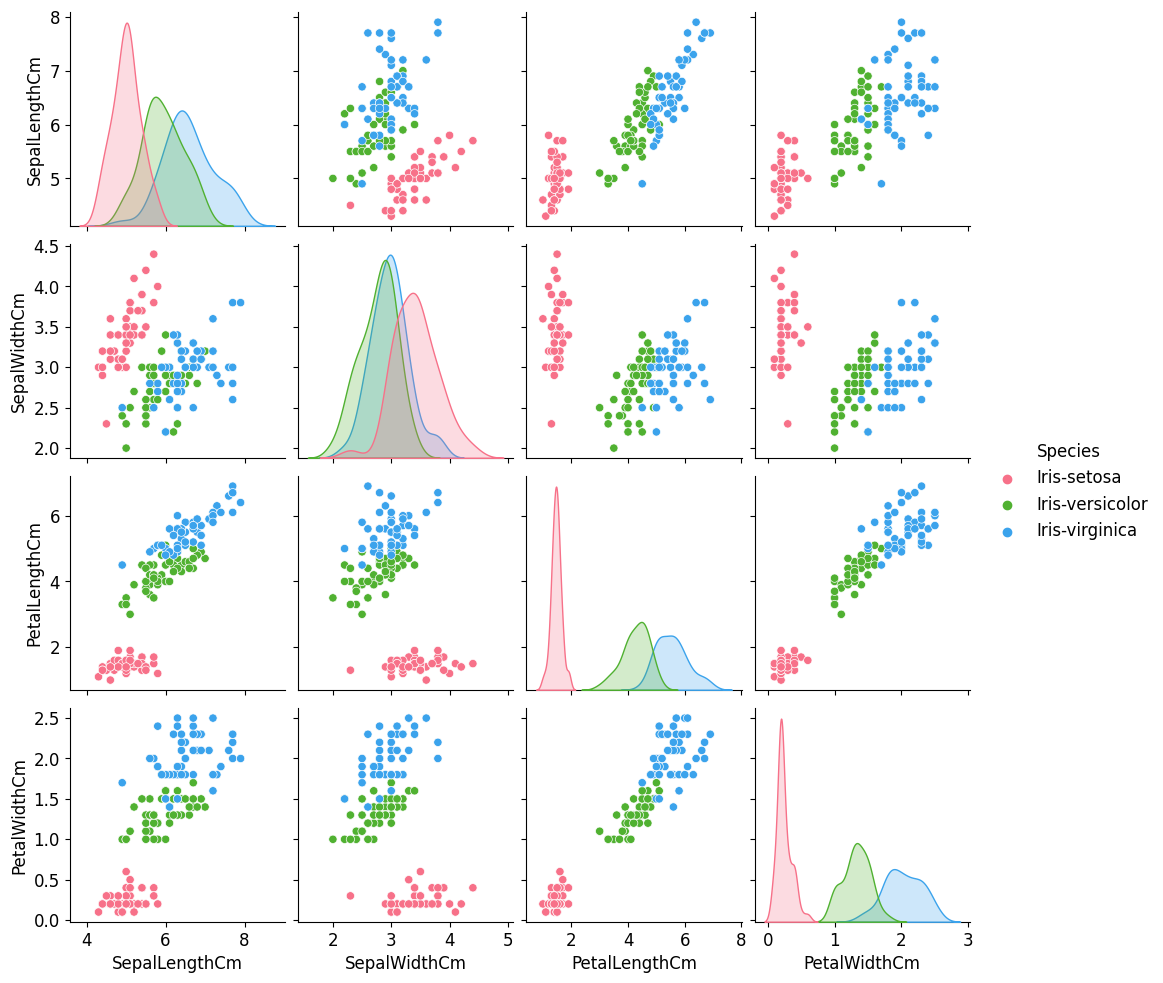

In [230]:
sns.pairplot(data=iris, hue="Species", diag_kind="kde", palette="husl")


It’s possible to force marginal histograms:

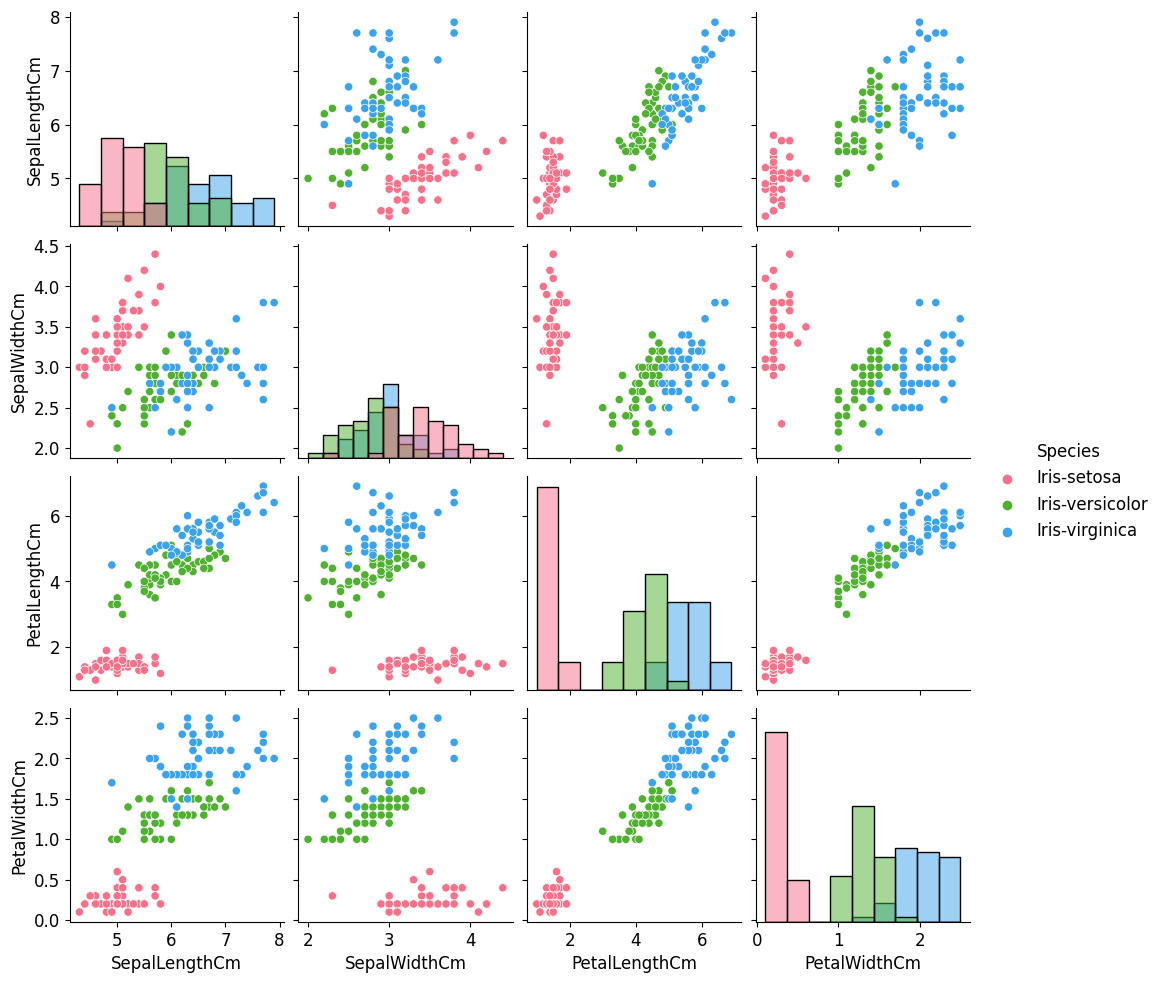

In [231]:
sns.pairplot(data=iris, hue="Species", diag_kind="hist", palette="husl")

The kind parameter determines both the diagonal and off-diagonal plotting style. Several options are available, including using kdeplot() to draw KDEs:

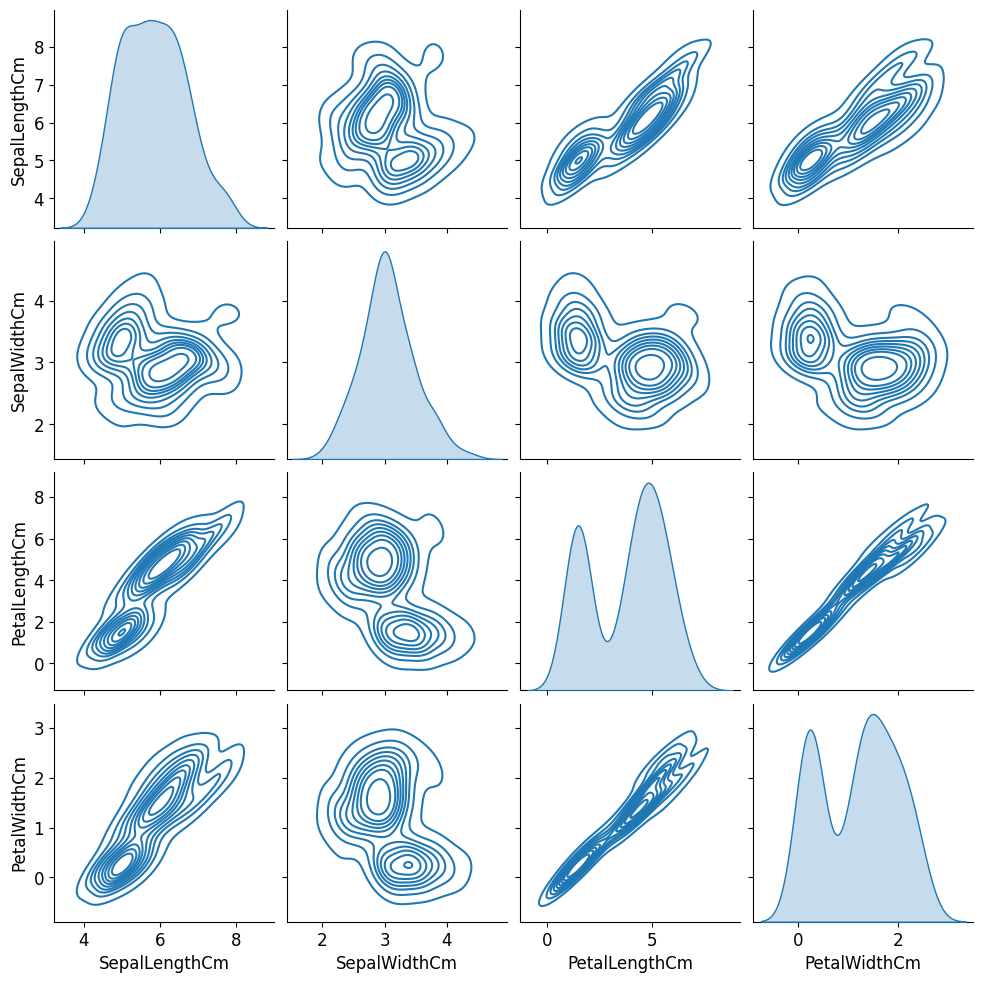

In [232]:
sns.pairplot(iris, kind="kde")

Or histplot() to draw both bivariate and univariate histograms:

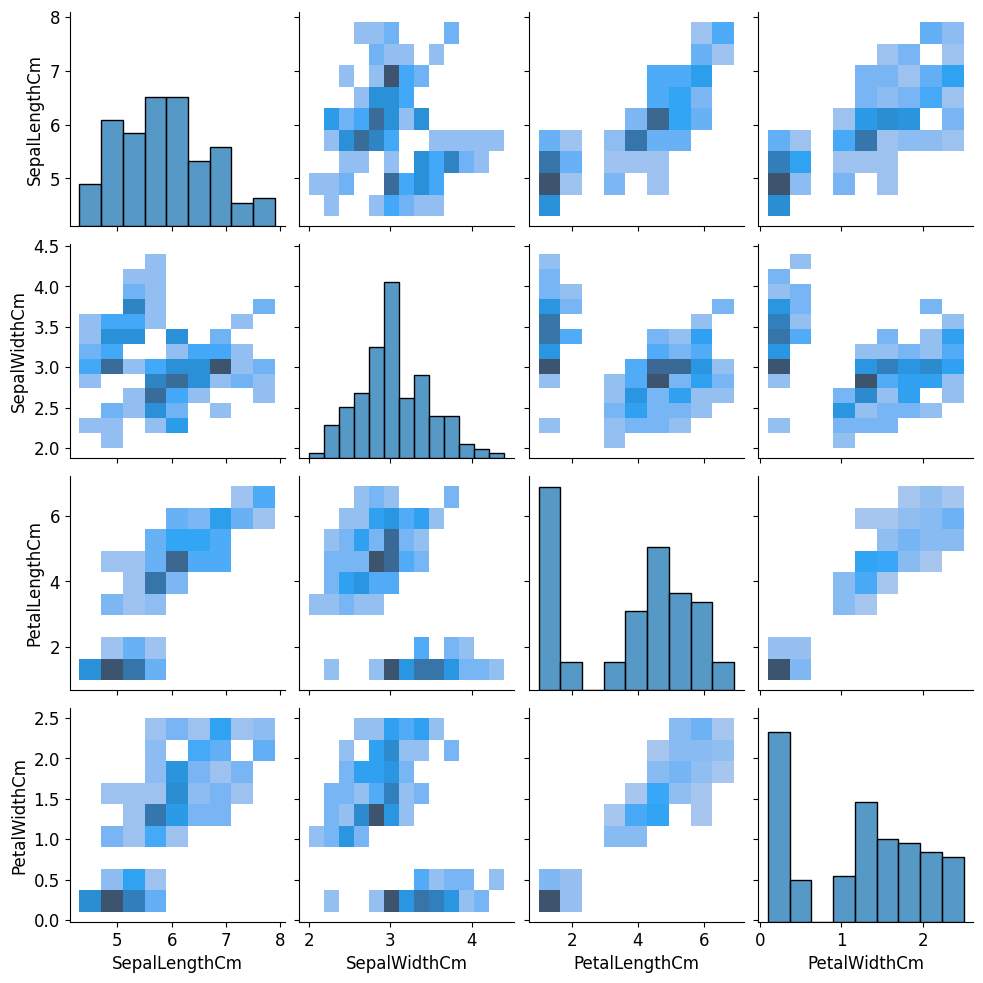

In [233]:
sns.pairplot(iris, kind='hist', palette='colorblind')

The pair plot visually demonstrates how different features can be used to distinguish between the species of iris flowers. PetalLengthCm and PetalWidthCm are particularly effective in separating the species. The distinct clusters and linear relationships observed in the scatter plots can guide feature selection for classification models.


---
# **Multivariate and Relationship Visualization**
Multivariate visualization refers to the representation of data that involves more than two variables. These visualizations help in understanding the complex relationships between multiple variables simultaneously. Relationship visualization focuses on showing how two or more variables relate to each other.

Seaborn provides several tools for multivariate and relationship visualization, which are useful for:

- Identifying patterns and correlations.
- Understanding the structure and distribution of data.
- Detecting outliers and anomalies.
- Comparing different groups within the data.

## **Heatmap**

Heatmaps organize data in a grid, with different colors or shades indicating different levels of the data's magnitude.

The visual nature of heatmaps allows for immediate recognition of patterns, such as clusters, trends, and anomalies. This makes heatmaps an effective tool for exploratory data analysis.

Heatmaps are also useful for visually comparing data across two dimensions, such as different time periods or categories. For geographical data analysis, heatmaps can represent the density or intensity of events across a spatial layout, such as population density or crime hotspots in a city.

We will create a heatmap showing the correlation coefficient between each numeric variable in our data. We’ll keep the heatmap simple for now and customize it further in the next section.

In [234]:
# taking only numerical columns
iris.drop(columns='Species', inplace=True)

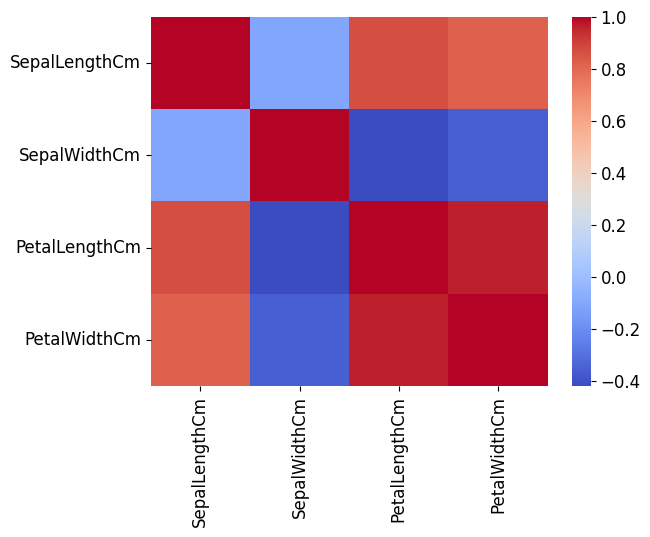

In [235]:
corr_matrix = iris.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

- The positive values mean positive relation(if one variabl increase other increase also)
- While negative value indicate negative realtion( If one variable increase other decrease.
- Zero means no relation at all.

From the above heattmap we can infer that:
- Petal length and Petal width have a strong correation.
- Petal Length and Sepal width have negative correaltion between them.

#### **Color customization**
Customizing the color of your heatmap makes it easier to read and leads to more eye-catching visuals in reports and presentations.

Setting vmin and vmax allows you to control the range of your data that the colormap covers. This can enhance contrast and focus on particular ranges of interest.

For diverging colormaps, use the center parameter to specify the midpoint value. This ensures that the color contrast is anchored around a critical value.

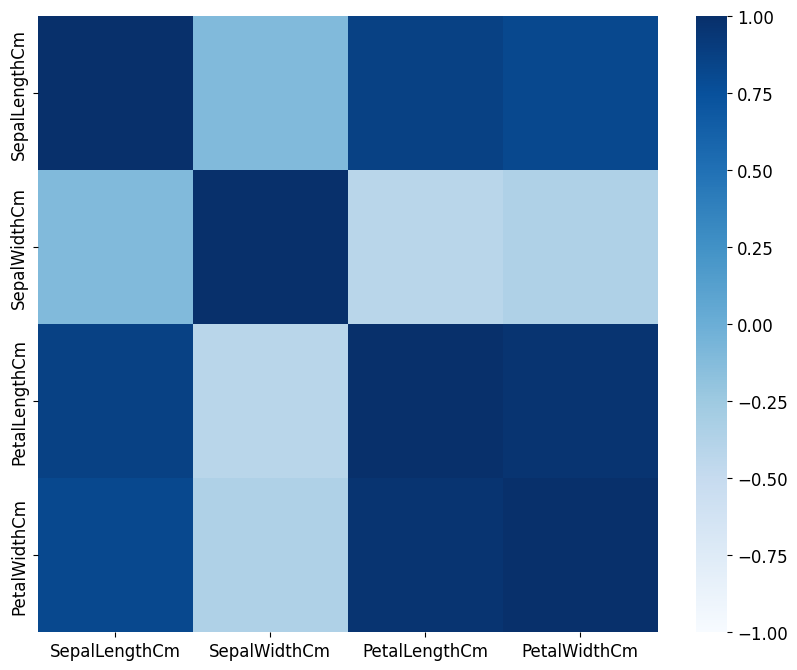

In [236]:
# Customize heatmap colors
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, cmap = 'Blues', vmin = -1, vmax = 1, center = 0)
plt.show()


#### **Data annotation**
Data annotation involves adding labels within each cell which could display numerical values or some text. Annotations make it easier to read and interpret heatmaps quickly without having to figure out the values based on the legend.

To enable annotations, set the annot parameter to True. This will display the data values in each cell of the heatmap.

The fmt parameter allows you to format the text of the annotations. For example, use 'd' for integer formatting and '.2f' for floating-point numbers displayed with two decimal places.

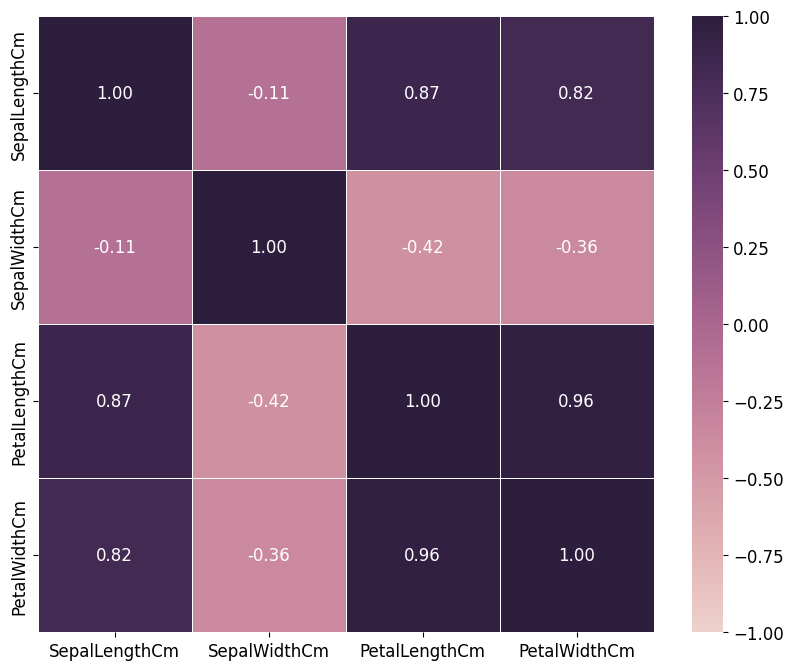

In [237]:
# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr_matrix, cmap=sns.cubehelix_palette(as_cmap=True), vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


#### **Data masking**
Use the mask parameter of the seaborn.heatmap() function to apply your mask. Data points corresponding to True in the mask will be hidden.

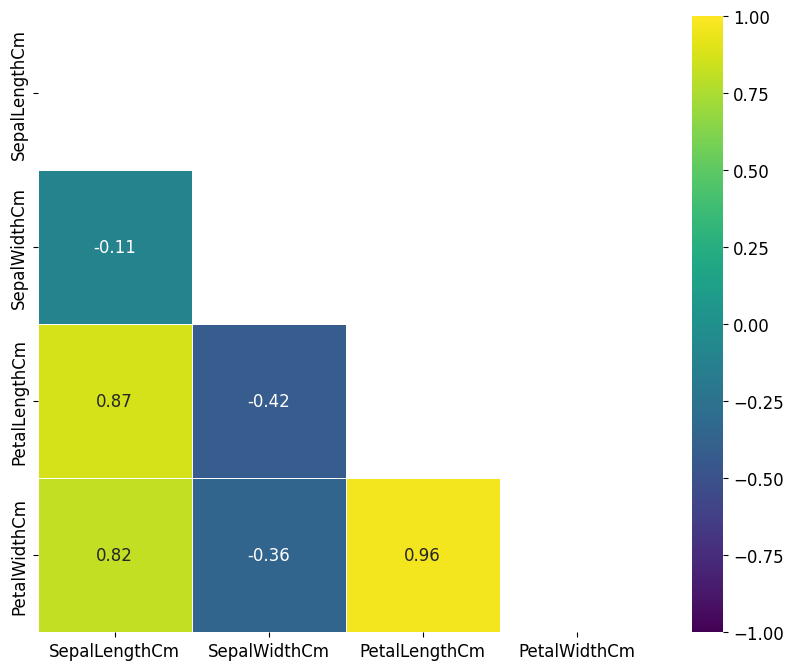

In [238]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

---
## **Joint Plot**
he final data-aware grid we will discuss is the JointGrid and its companion function, jointplot(). A JointGrid() allows us to compare the distribution of data between two variables. A JointGrid() makes use of scatter plots, regression lines, as well as histograms, distribution plots, and kernel density estimates to give us insights into our data.

You must define the grid and map the plots onto the grid. 

In [239]:
bike_share = pd.read_csv('/kaggle/input/bike-share/bike_share.csv')
bike_share.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


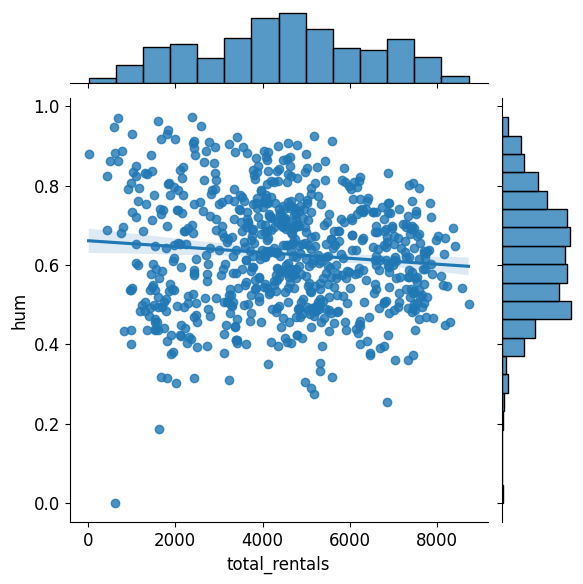

In [240]:
g = sns.JointGrid(data=bike_share, x='total_rentals', y='hum')
g.plot(sns.regplot, sns.histplot)

Here, we show the flexibility available through the JointGrid() function. The plot_joint() function specifies that a kde plot should be included in the center. The kdeplots on the margins are defined with plot_marginals(). This view of the data helps us understand the distributions of data for these two variables.

In this example, there is a large group of values that have total_rental between $2,000 and $8,000 and admission rates around 0.7.

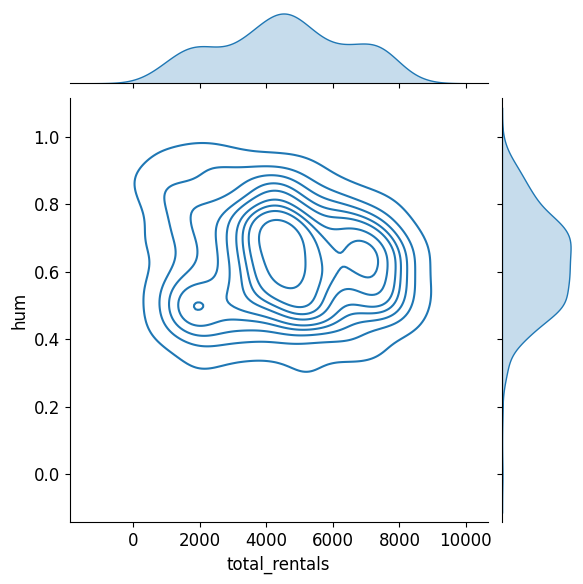

In [241]:
g = sns.JointGrid(data=bike_share, x='total_rentals', y='hum')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)

The jointplot() is easier to use but provides fewer customization capabilities. In this example, we show a hex plot as the method to demonstrate the relationship between the two variables. As you can see, this is a simpler approach than creating the JointGrid().

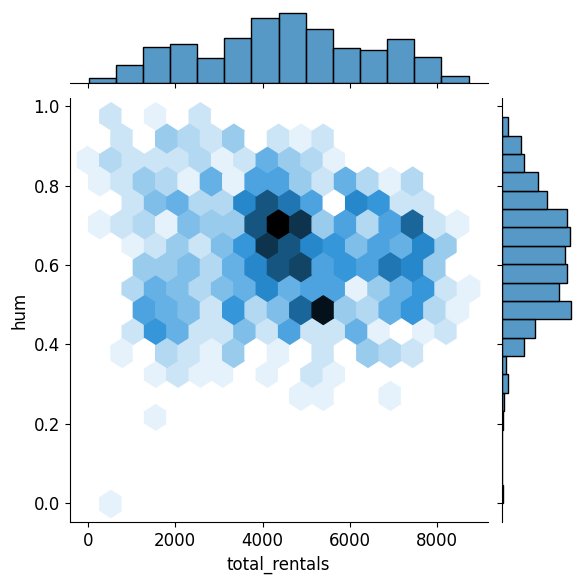

In [242]:
sns.jointplot(data=bike_share, x='total_rentals', y='hum', kind='hex')

#### **Customizing a jointplot**
The jointplot() supports simple creation of scatter, hex, residual, regression, and kde plots. It can also support adding overlay plots to enhance the final output.

The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

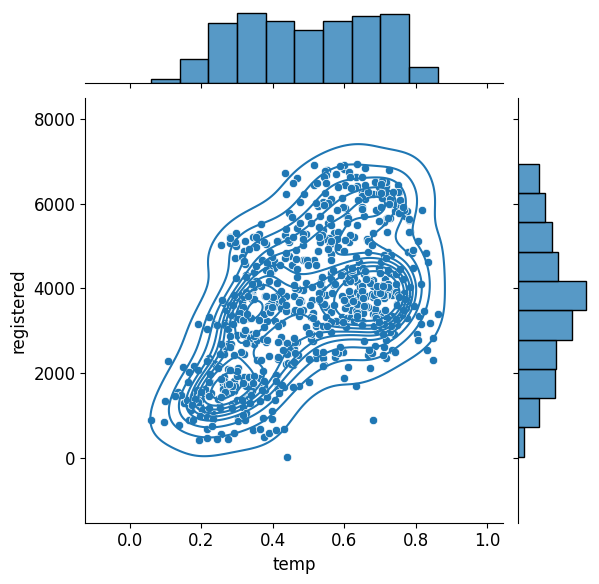

<Figure size 640x480 with 0 Axes>

In [243]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=bike_share,
             marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()

## **Facet Grid**
One of Seaborn's most powerful features is its ability to combine multiple smaller plots into a larger visualization that can help identify trends in data with many variables.

The concept of small multiples is useful for analyzing data with many variables. The idea is that you can quickly identify trends in data by comparing multiple plots side by side using the same scales and axes. These plots are referred to as a trellis or lattice plot. In data science, this concept is also frequently called faceting. 

Seaborn's FacetGrid manages the back end data manipulations to make sure that the data is split across rows, columns, and hue, and then used to make the appropriate plot type. The key point to remember is that FacetGrid() provides a lot of flexibility, but you must use a two step process of defining the Facets and mapping the plot type.

Calling the constructor requires a long-form data object. This initializes the grid, but doesn’t plot anything on it:

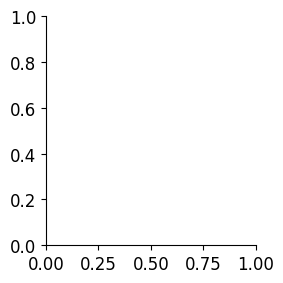

In [244]:
sns.FacetGrid(tips)

Assign column and/or row variables to add more subplots to the figure:

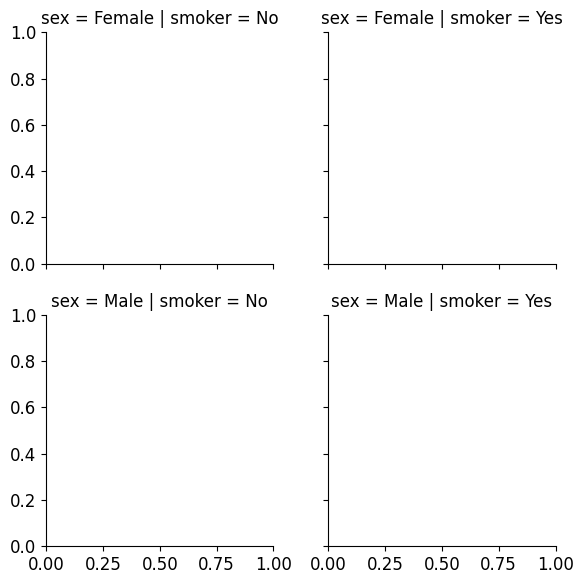

In [245]:
sns.FacetGrid(tips, col="smoker", row="sex")

To draw a plot on every facet, pass a function and the name of one or more columns in the dataframe to FacetGrid.map():

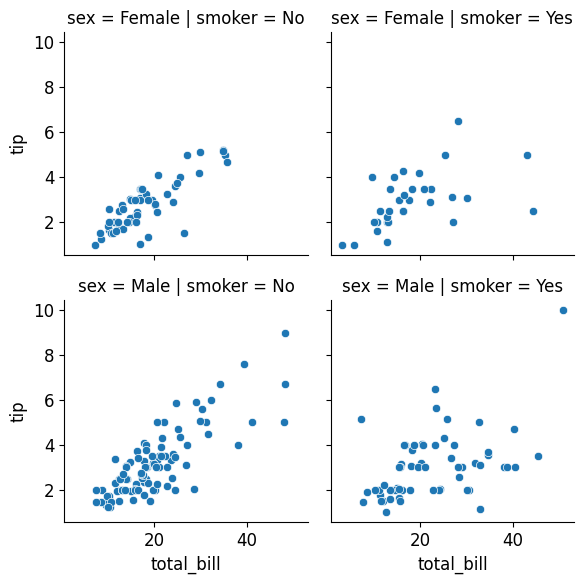

In [246]:
g = sns.FacetGrid(tips, col="smoker",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

The variable specification in FacetGrid.map() requires a positional argument mapping, but if the function has a data parameter and accepts named variable assignments, you can also use FacetGrid.map_dataframe():

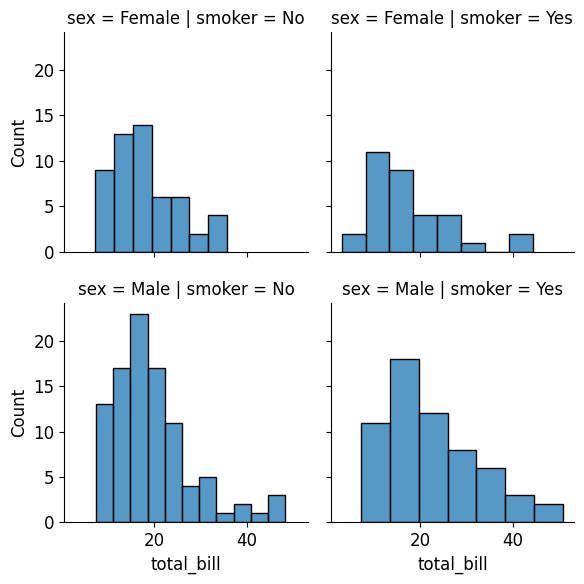

In [247]:
g = sns.FacetGrid(tips, col="smoker",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

Notice how the bins have different widths in each facet. A separate plot is drawn on each facet, so if the plotting function derives any parameters from the data, they may not be shared across facets. You can pass additional keyword arguments to synchronize them. But when possible, using a figure-level function like displot() will take care of this bookkeeping for you:

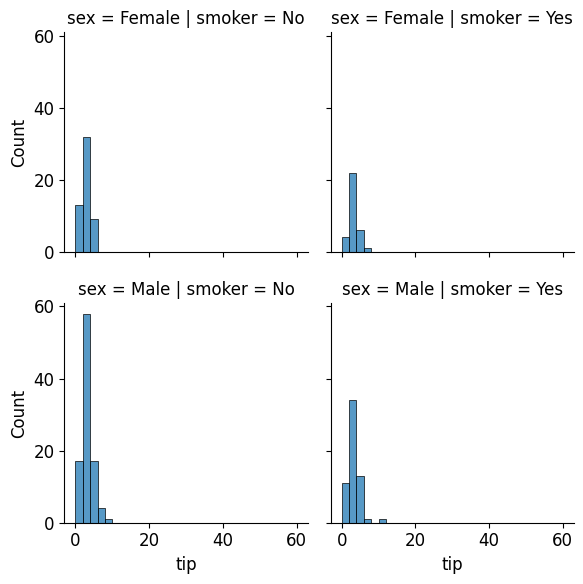

In [248]:
g = sns.FacetGrid(tips, col="smoker", row="sex")
g.map_dataframe(sns.histplot, x="tip", binwidth=2, binrange=(0, 60))

The FacetGrid constructor accepts a hue parameter. Setting this will condition the data on another variable and make multiple plots in different colors. Where possible, label information is tracked so that a single legend can be drawn:

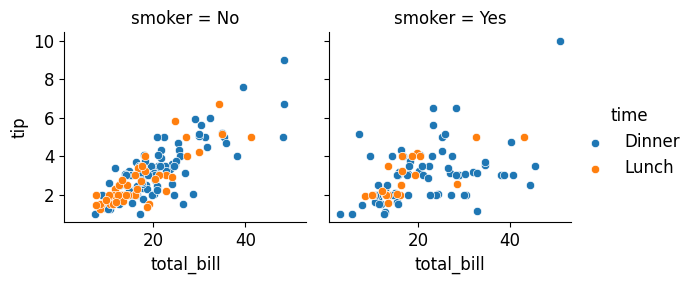

In [249]:
g = sns.FacetGrid(tips, col="smoker", hue="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()